In [1]:
import rioxarray as rxr
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
et = rxr.open_rasterio(
    "../data/processed/kolhapur_et_ssebop_fao56_mmday.tif",
    masked=True
)

et


<xarray.DataArray (band: 1, y: 161, x: 113)> Size: 146kB
[18193 values with dtype=float64]
Coordinates:
  * band         (band) int64 8B 1
  * y            (y) float64 1kB 17.18 17.17 17.16 17.15 ... 15.76 15.75 15.74
  * x            (x) float64 904B 73.69 73.7 73.71 73.72 ... 74.68 74.69 74.7
    spatial_ref  int64 8B 0
Attributes: (12/34)
    GRIB_cfName:                              unknown
    GRIB_cfVarName:                           t2m
    GRIB_dataType:                            fc
    GRIB_gridDefinitionDescription:           Latitude/Longitude Grid
    GRIB_gridType:                            regular_ll
    GRIB_iDirectionIncrementInDegrees:        0.1
    ...                                       ...
    GRIB_uvRelativeToGrid:                    0
    standard_name:                            unknown
    units:                                    K
    AREA_OR_POINT:                            Area
    scale_factor:                             1.0
    add_offset:                               0.0

In [3]:
if "band" in et.dims:
    et = et.squeeze("band")

et


<xarray.DataArray (y: 161, x: 113)> Size: 146kB
[18193 values with dtype=float64]
Coordinates:
  * y            (y) float64 1kB 17.18 17.17 17.16 17.15 ... 15.76 15.75 15.74
  * x            (x) float64 904B 73.69 73.7 73.71 73.72 ... 74.68 74.69 74.7
    band         int64 8B 1
    spatial_ref  int64 8B 0
Attributes: (12/34)
    GRIB_cfName:                              unknown
    GRIB_cfVarName:                           t2m
    GRIB_dataType:                            fc
    GRIB_gridDefinitionDescription:           Latitude/Longitude Grid
    GRIB_gridType:                            regular_ll
    GRIB_iDirectionIncrementInDegrees:        0.1
    ...                                       ...
    GRIB_uvRelativeToGrid:                    0
    standard_name:                            unknown
    units:                                    K
    AREA_OR_POINT:                            Area
    scale_factor:                             1.0
    add_offset:                               0.0

In [4]:
time = pd.date_range(
    start="2023-01-01",
    end="2023-12-31",
    freq="M"
)

et_ts = et.expand_dims(time=time)

et_ts


C:\Users\Admin\AppData\Local\Temp\ipykernel_3964\331376534.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  time = pd.date_range(


<xarray.DataArray (time: 12, y: 161, x: 113)> Size: 2MB
array([[[       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan, 7.15466858, ...,        nan,
                nan,        nan],
        [7.15466858, 7.15466858, 7.15466858, ...,        nan,
                nan,        nan],
        ...,
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan]],

       [[       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan, 7.15466858, ...,        nan,
                nan,        nan],
        [7.15466858, 7.15466858, 7.15466858, ...,        nan,
                nan,        nan],
...
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan]],

       [[       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan, 7.15466858, ...,        nan,
                nan,        nan],
        [7.15466858, 7.15466858, 7.15466858, ...,        nan,
                nan,        nan],
        ...,
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan]]], shape=(12, 161, 113))
Coordinates:
  * time         (time) datetime64[ns] 96B 2023-01-31 2023-02-28 ... 2023-12-31
  * y            (y) float64 1kB 17.18 17.17 17.16 17.15 ... 15.76 15.75 15.74
  * x            (x) float64 904B 73.69 73.7 73.71 73.72 ... 74.68 74.69 74.7
    band         int64 8B 1
    spatial_ref  int64 8B 0
Attributes: (12/34)
    GRIB_cfName:                              unknown
    GRIB_cfVarName:                           t2m
    GRIB_dataType:                            fc
    GRIB_gridDefinitionDescription:           Latitude/Longitude Grid
    GRIB_gridType:                            regular_ll
    GRIB_iDirectionIncrementInDegrees:        0.1
    ...                                       ...
    GRIB_uvRelativeToGrid:                    0
    standard_name:                            unknown
    units:                                    K
    AREA_OR_POINT:                            Area
    scale_factor:                             1.0
    add_offset:                               0.0

In [5]:
days_in_month = et_ts["time"].dt.days_in_month

et_monthly = et_ts * days_in_month

et_monthly


<xarray.DataArray (time: 12, y: 161, x: 113)> Size: 2MB
array([[[         nan,          nan,          nan, ...,          nan,
                  nan,          nan],
        [         nan,          nan, 221.79472583, ...,          nan,
                  nan,          nan],
        [221.79472583, 221.79472583, 221.79472583, ...,          nan,
                  nan,          nan],
        ...,
        [         nan,          nan,          nan, ...,          nan,
                  nan,          nan],
        [         nan,          nan,          nan, ...,          nan,
                  nan,          nan],
        [         nan,          nan,          nan, ...,          nan,
                  nan,          nan]],

       [[         nan,          nan,          nan, ...,          nan,
                  nan,          nan],
        [         nan,          nan, 200.3307201 , ...,          nan,
                  nan,          nan],
        [200.3307201 , 200.3307201 , 200.3307201 , ...,          nan,
                  nan,          nan],
...
        [         nan,          nan,          nan, ...,          nan,
                  nan,          nan],
        [         nan,          nan,          nan, ...,          nan,
                  nan,          nan],
        [         nan,          nan,          nan, ...,          nan,
                  nan,          nan]],

       [[         nan,          nan,          nan, ...,          nan,
                  nan,          nan],
        [         nan,          nan, 221.79472583, ...,          nan,
                  nan,          nan],
        [221.79472583, 221.79472583, 221.79472583, ...,          nan,
                  nan,          nan],
        ...,
        [         nan,          nan,          nan, ...,          nan,
                  nan,          nan],
        [         nan,          nan,          nan, ...,          nan,
                  nan,          nan],
        [         nan,          nan,          nan, ...,          nan,
                  nan,          nan]]], shape=(12, 161, 113))
Coordinates:
  * time         (time) datetime64[ns] 96B 2023-01-31 2023-02-28 ... 2023-12-31
  * y            (y) float64 1kB 17.18 17.17 17.16 17.15 ... 15.76 15.75 15.74
  * x            (x) float64 904B 73.69 73.7 73.71 73.72 ... 74.68 74.69 74.7
    band         int64 8B 1
    spatial_ref  int64 8B 0
Attributes: (12/34)
    GRIB_cfName:                              unknown
    GRIB_cfVarName:                           t2m
    GRIB_dataType:                            fc
    GRIB_gridDefinitionDescription:           Latitude/Longitude Grid
    GRIB_gridType:                            regular_ll
    GRIB_iDirectionIncrementInDegrees:        0.1
    ...                                       ...
    GRIB_uvRelativeToGrid:                    0
    standard_name:                            unknown
    units:                                    K
    AREA_OR_POINT:                            Area
    scale_factor:                             1.0
    add_offset:                               0.0

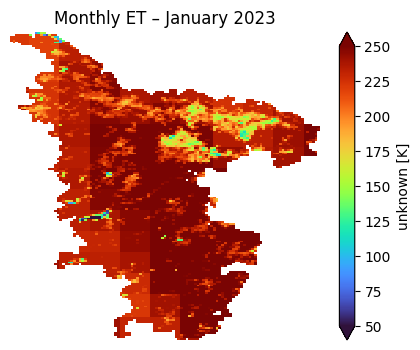

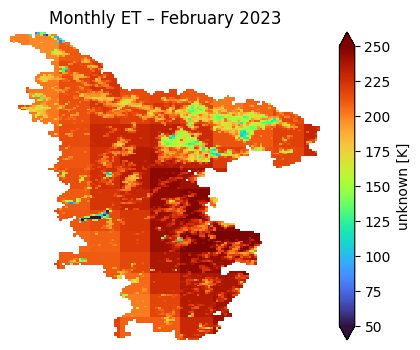

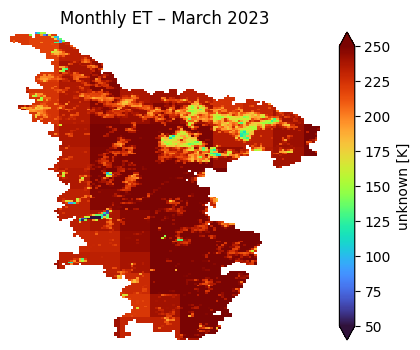

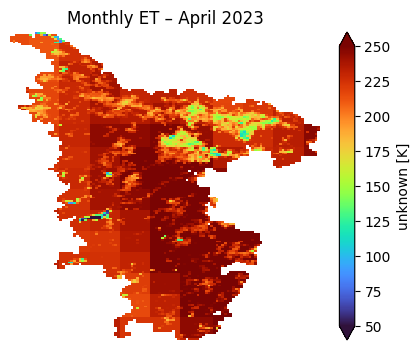

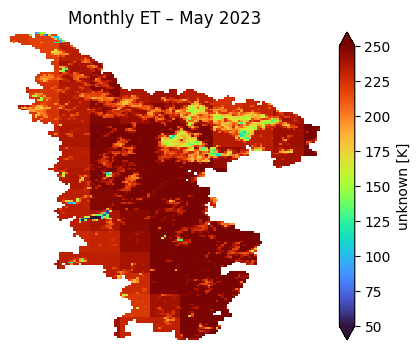

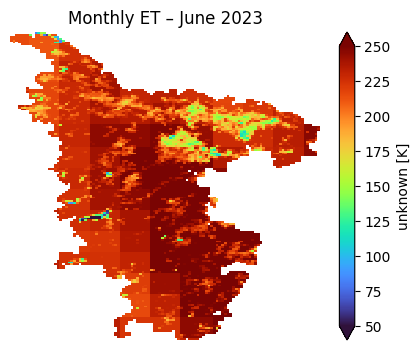

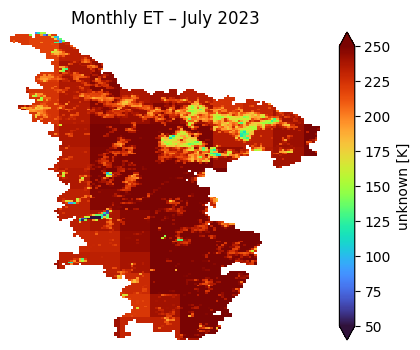

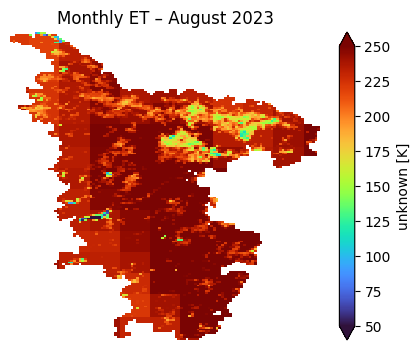

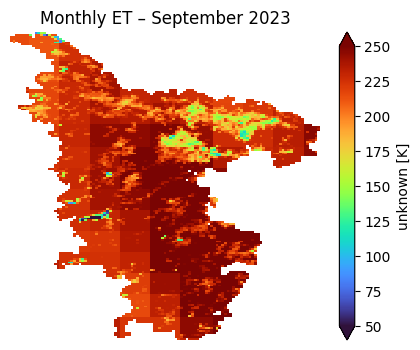

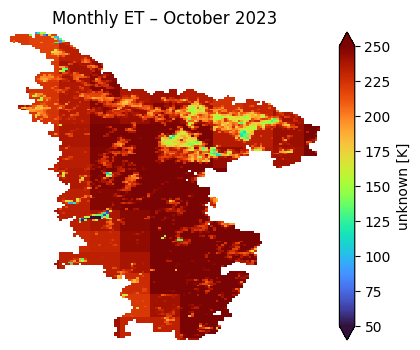

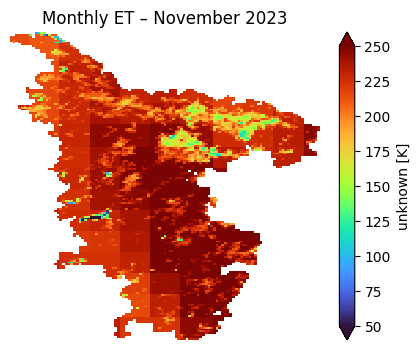

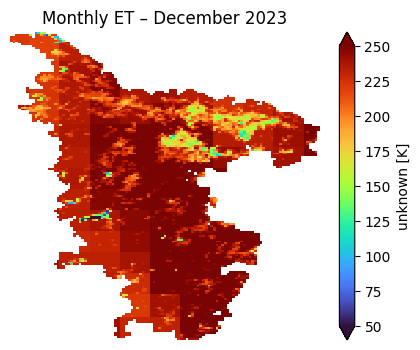

In [6]:
for i in range(12):
    plt.figure(figsize=(5,4))
    et_monthly.isel(time=i).plot(
        cmap="turbo",
        vmin=50,
        vmax=250
    )
    month_name = et_monthly.time[i].dt.strftime("%B %Y").item()
    plt.title(f"Monthly ET – {month_name}")
    plt.axis("off")
    plt.show()


In [9]:
monthly_mean_et = et_monthly.mean(dim=("y", "x"))
monthly_mean_et


<xarray.DataArray (time: 12)> Size: 96B
array([236.31631787, 213.44699679, 236.31631787, 228.69321084,
       236.31631787, 228.69321084, 236.31631787, 236.31631787,
       228.69321084, 236.31631787, 228.69321084, 236.31631787])
Coordinates:
  * time         (time) datetime64[ns] 96B 2023-01-31 2023-02-28 ... 2023-12-31
    band         int64 8B 1
    spatial_ref  int64 8B 0
Attributes: (12/34)
    GRIB_cfName:                              unknown
    GRIB_cfVarName:                           t2m
    GRIB_dataType:                            fc
    GRIB_gridDefinitionDescription:           Latitude/Longitude Grid
    GRIB_gridType:                            regular_ll
    GRIB_iDirectionIncrementInDegrees:        0.1
    ...                                       ...
    GRIB_uvRelativeToGrid:                    0
    standard_name:                            unknown
    units:                                    K
    AREA_OR_POINT:                            Area
    scale_factor:                             1.0
    add_offset:                               0.0

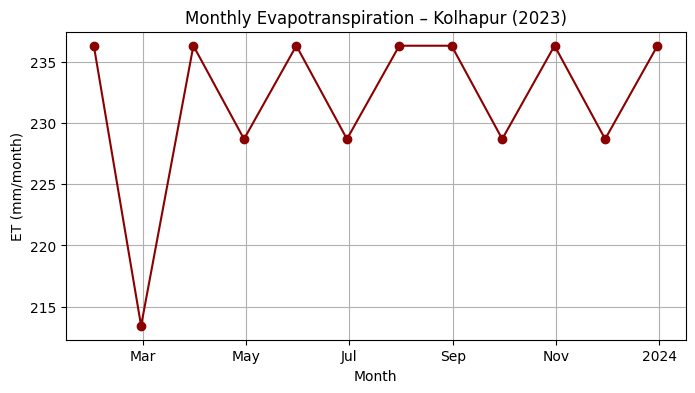

In [10]:
plt.figure(figsize=(8,4))
monthly_mean_et.plot(marker="o", color="darkred")
plt.ylabel("ET (mm/month)")
plt.xlabel("Month")
plt.title("Monthly Evapotranspiration – Kolhapur (2023)")
plt.grid(True)
plt.show()


In [11]:
seasons = {
    "Winter (DJF)": [12, 1, 2],
    "Summer (MAM)": [3, 4, 5],
    "Monsoon (JJAS)": [6, 7, 8, 9],
    "Post-Monsoon (ON)": [10, 11]
}

seasonal_et = {}

for season, months in seasons.items():
    mask = et_monthly["time"].dt.month.isin(months)
    seasonal_et[season] = float(
        et_monthly.sel(time=mask).mean()
    )

seasonal_et


{'Winter (DJF)': 228.6932108423063,
 'Summer (MAM)': 233.77528219435757,
 'Monsoon (JJAS)': 232.50476435634477,
 'Post-Monsoon (ON)': 232.50476435634477}

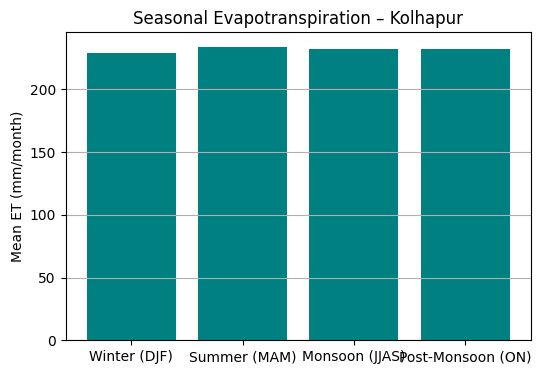

In [12]:
plt.figure(figsize=(6,4))
plt.bar(
    seasonal_et.keys(),
    seasonal_et.values(),
    color="teal"
)
plt.ylabel("Mean ET (mm/month)")
plt.title("Seasonal Evapotranspiration – Kolhapur")
plt.grid(axis="y")
plt.show()


In [13]:
for season, value in seasonal_et.items():
    print(f"{season}: {value:.2f} mm/month")


Winter (DJF): 228.69 mm/month
Summer (MAM): 233.78 mm/month
Monsoon (JJAS): 232.50 mm/month
Post-Monsoon (ON): 232.50 mm/month
